In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib

#tf.enable_eager_execution()

In [2]:
from tensorflow.keras.applications import MobileNet, Xception, ResNet50

In [3]:
img_size = 224  ## MobileNet, ResNet50
#img_size = 299 ## xception
conv_base = MobileNet(weights='imagenet', include_top=True,
                     input_shape=(img_size, img_size, 3))
#conv_base = Xception(weights='imagenet', include_top=True,
#                     input_shape=(img_size, img_size, 3))
#conv_base = ResNet50(weights='imagenet', include_top=True,
#                 input_shape=(img_size, img_size, 3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [5]:
conv_base.trainable = False

In [6]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [7]:
model = keras.models.Sequential()
model.add(conv_base)

In [8]:
from PIL import Image

#currimg = Image.open("data/boat.jpg")
currimg = Image.open("data/dog.jpg")
currimg = currimg.resize((img_size, img_size))
image = np.asarray(currimg)/255. ## MobileNet, Xception
#image = np.asarray(currimg)  ## ResNet50
image = np.reshape(image, (-1, img_size, img_size, 3))
image.shape

(1, 224, 224, 3)

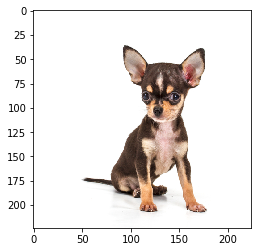

In [9]:
plt.imshow(image[0])
plt.show()

In [10]:
prediction = np.argmax(model.predict(image), -1)

In [11]:
prediction2 = np.argmax(conv_base.predict(image), -1)

In [12]:
prediction, prediction2

(array([151], dtype=int64), array([151], dtype=int64))

In [13]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [14]:
imagenet_labels[prediction+1]

array(['Chihuahua'], dtype='<U30')

In [15]:
imagenet_labels[prediction2+1]

array(['Chihuahua'], dtype='<U30')